In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def grabData(filen):
    data = []
    with open(filen,'r')as file:
        for line in file:
            tmp = line.strip().split('-')
            cost = int(tmp[0])
            value = int(tmp[1])
            found = False
            for i in range(len(data)):
                if(data[i][0] == cost):
                    data[i][1] += 1
                    data[i][2] += value
                    found = True
            if(not found):
                data.append(list([cost,1,value]))
    
    finaldata = []
    for i in range(len(data)):
        cost = data[i][0]
        count = data[i][2] / data[i][1]
        finaldata.append((cost,count))

    return(finaldata)
            
            


bfsData = grabData('bfsSearch.txt')
a1Data = grabData('A1Search.txt')
a2Data = grabData('A2Search.txt')

print(bfsData)
print(a1Data)
print(a2Data)

[(2, 21.1), (4, 89.6), (8, 1672.090909090909), (12, 23195.0), (14, 116830.5), (16, 431604.8333333333), (20, 6913305.0), (22, 20533364.0)]
[(2, 12.7), (4, 21.9), (8, 60.18181818181818), (12, 223.0), (16, 1116.142857142857), (14, 476.0), (20, 2923.0), (22, 28679.0)]
[(2, 12.7), (4, 20.9), (8, 51.18181818181818), (12, 134.0), (16, 319.0), (14, 197.0), (20, 501.0), (22, 4941.0)]


TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

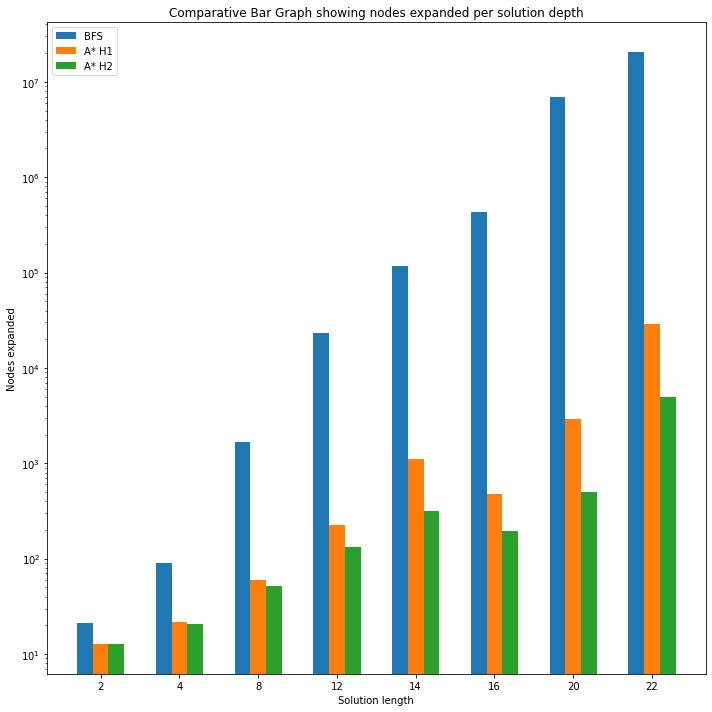

In [4]:
# Extract x and y values from each dataset
x_values, y_values1 = zip(*bfsData)
_, y_values2 = zip(*a1Data)
_, y_values3 = zip(*a2Data)

# Set up the figure and axes
plt.figure(figsize=(10,10))

# Define bar width (you can adjust this as per your preference)
bar_width = 0.2

# Calculate positions for each group of bars
bar_positions1 = np.arange(len(x_values))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions1 + 2 * bar_width

# Plot the bars for each dataset
plt.bar(bar_positions1, y_values1, width=bar_width, label='BFS')
plt.bar(bar_positions2, y_values2, width=bar_width, label='A* H1')
plt.bar(bar_positions3, y_values3, width=bar_width, label='A* H2')

# Set labels and title
plt.xlabel('Solution length')
plt.ylabel('Nodes expanded')
plt.title('Comparative Bar Graph showing nodes expanded per solution depth')
plt.legend()

# Set the x-axis ticks to show the original indices
plt.xticks(bar_positions2, x_values)
plt.yscale('log') 

# Show the plot
plt.tight_layout()
plt.savefig()
plt.show()